# Project Two: Part Two
### Healthy Bison: Lifestyle Choices and Their Impact On College Students


Name: M. Ashura Langford

Student ID: 004001453

#### Data Wrangling:

In [3]:
import pandas as pd
df = pd.read_csv('student_lifestyle_dataset(psych).csv')
#copy to new data frame
data= df.copy()
#check for missing and duplicated data
print(data.isnull().sum())
print("\nDuplicated Data:\n",data.duplicated().sum())
#add new variables
data['Total_Activity_Hours'] = data['Study_Hours_Per_Day'] + \
                               data['Extracurricular_Hours_Per_Day'] + \
                               data['Social_Hours_Per_Day'] + \
                               data['Physical_Activity_Hours_Per_Day']
#check for missing and duplicated data
print(data.isnull().sum())
print("\nDuplicated Data:",data.duplicated().sum())
#summary
print("\n Summary Statistics:\n",data.describe())

high_stress = data[data['Stress_Level'] == 'High']

print("\n\nHigh Stress Filter:\n",high_stress.head())

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
dtype: int64

Duplicated Data:
 0
Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
Total_Activity_Hours               0
dtype: int64

Duplicated Data: 0

 Summary Statistics:
         Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                    

**Interpretation:** The summary statistics provide insights into the central tendency, spread, and range of the numerical values within the dataset. My particular summary tells me that the average study hours(~7.48) and the average sleep hours(7.50) are somewhat high. These results suggest that the typical student in this sample has a relatively focused and well-rested lifestyle. The average GPA(7.78) is also moderately high. The average extracurricular time(1.99 hours) is low, and the average social time (2.70 hours) is moderate, which shows that students spend less time on these activities compared to studying or sleeping. 

Using *is.null().sum()* function makes the code check to look at the total missing values within each column. The function *.duplicated().sum()* makes the code look for any duplicated data. Based on the results, there are no missing or duplicated values.

Filtering for high stress allows me to see what each student who reported themselves as having high stress puts their hours towards on a daily basis. 

#### SECTION I: INDIVIDUAL, COMPARATIVE AND GROUPED VISUALIZATIONS

In [6]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

##### Histogram

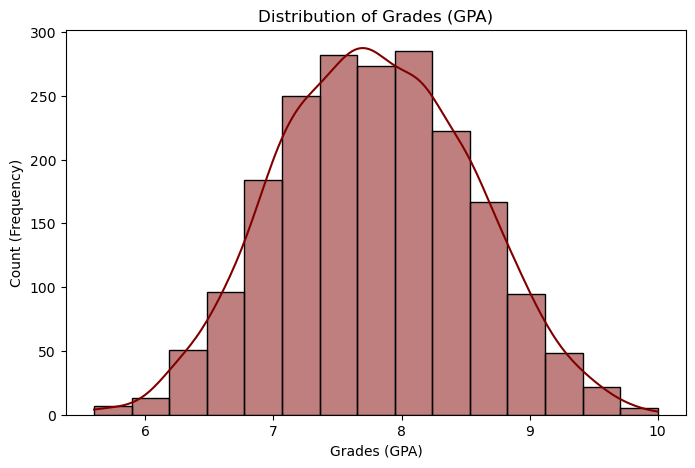

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Grades', bins=15, kde=True, color= 'maroon', edgecolor='black')
plt.title("Distribution of Grades (GPA)")
plt.xlabel("Grades (GPA)")
plt.ylabel("Count (Frequency)")
plt.savefig('grade.dis.jpg')
plt.show()

**Interpretation:**
The histogram of the grade distribution visualized the frequency of different GPA scores among the students. Assuming the grades are on a 10.0 scale, the histogram shows that the scores are partially left-skewed, meaning most students achieve higher GPA scores, with fewer students scoring in the middle or lower ranges. The distribution likely peaks around the average GPA, illustrating that while the average is moderately high, the general shape of the student body's academic performance leans toward above-average achievement. This distribution confirms that the majority of the students in the dataset are somewhat high-performing.

In [58]:
data['Grades'].mean()

np.float64(7.7898249999999996)

##### Bar Chart

/var/folders/0d/9sp_0d090519swk552qhlzq00000gn/T/ipykernel_55205/2881946284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data= data, palette=['maroon','orange','gold'])


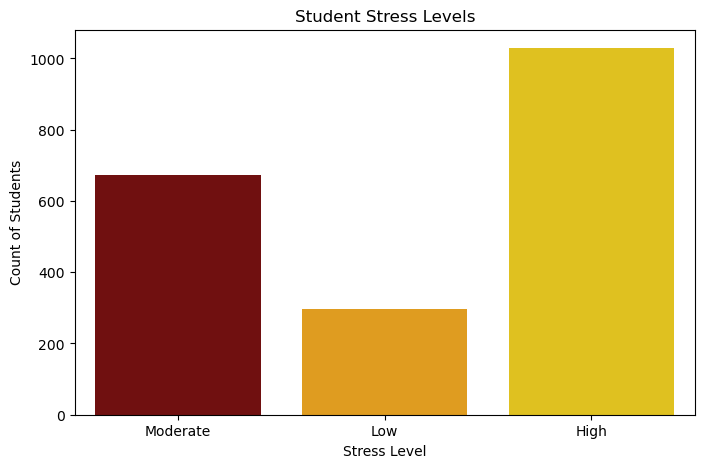

In [5]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Stress_Level', data= data, palette=['maroon','orange','gold'])
plt.title("Student Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count of Students")
plt.savefig('student_stress.jpg')
plt.show()


**Interpretation:**
The distribution of stress among students is clearly overwhelmed by the High Stress category, which accounts for the largest count of students (over 1000). The Moderate Stress level is the next most common, with approximately 680 students. The smallest group is the Low Stress category, with only about 300 students. This heavily skewed distribution suggests that the majority of students in this dataset report experiencing High to Moderate stress, meaning stress is a significant factor in their lifestyle.

##### Bar Plot

In [14]:

bins = [0, 7.79, 10.0] 
labels = ['Below Average GPA (0-7.79)', 'Above Average GPA (7.79-10)']

#new categorical column for grades
data['Grade_Category'] = pd.cut(data['Grades'], bins=bins, labels=labels, right=True)

#Checking my work
print(data.head())

# Group the data
grouped = data.groupby(['Stress_Level', 'Grade_Category']).size().reset_index(name='Count')
print(f' \n\nGrouped Data\n\n',grouped.head(),)



   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

  Stress_Level  Gender  Grades  Total_Activity_Hours  \
0     Moderate    Male    7.48            

/var/folders/0d/9sp_0d090519swk552qhlzq00000gn/T/ipykernel_67824/3046917106.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['Stress_Level', 'Grade_Category']).size().reset_index(name='Count')


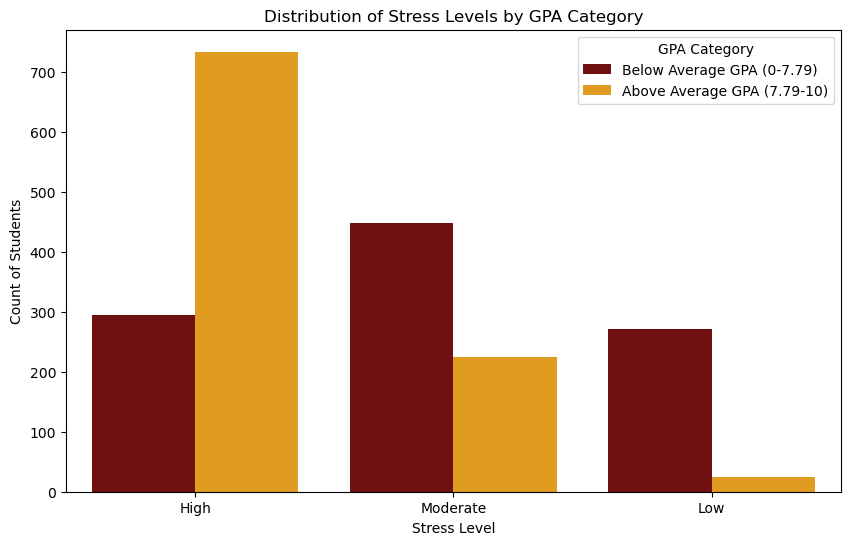

In [25]:
stress_order = ['High', 'Moderate', 'Low'] 

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Stress_Level',
    y='Count',
    hue='Grade_Category',
    data=grouped,
    order=stress_order,
    palette= ['maroon','orange']
)

plt.title("Distribution of Stress Levels by GPA Category")
plt.xlabel("Stress Level")
plt.ylabel("Count of Students")
plt.legend(title='GPA Category')
plt.savefig('Stress_GPACat.jpg')
plt.show()

**Interpretation:**
The grouped bar plot comparing Stress Levels across the two GPA Categories visually demonstrates a significant difference in stress distribution between students achieving above and below average grades. Students in the Below Average GPA category (red bars) show higher counts for low stress levels compared to the Above Average GPA students (yellow bars). Most notably, the largest single group of stressed students falls in the High Stress category for the Above Average GPA group, indicating that a substantial portion of high-achieving students report high stress. Based on this distribution, high-achieving students most likely experience higher rates of stress compared to low-achieving students, which is most likely due to the time spent studying. 

##### Box Plot

/var/folders/0d/9sp_0d090519swk552qhlzq00000gn/T/ipykernel_55205/2147357623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Grades', data=data, palette=['skyblue','salmon'])


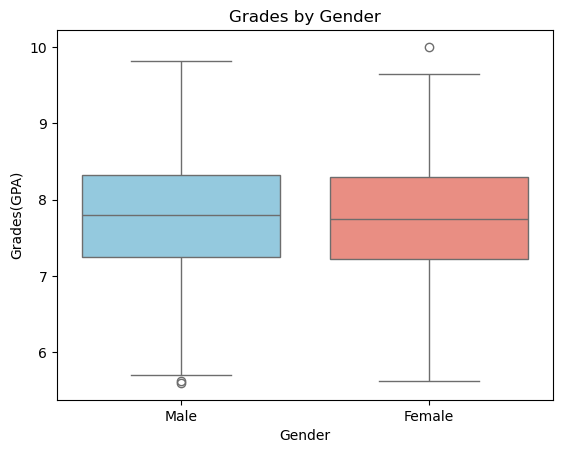

In [55]:
sns.boxplot(x='Gender', y='Grades', data=data, palette=['skyblue','salmon'])
plt.title("Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Grades(GPA)")
plt.savefig('Grades_Gender.jpg')
plt.show()

**Interpretation:** This distribution allows me to see the difference in GPA scores across the genders. The data shows that female and male students have about the same GPA scores with there being outliers for both groups. For the male students, there are about two outliers below the minimum, and for the female students there is one student that is way above the max. The data indicates there no real difference in grades across gender. 

/var/folders/0d/9sp_0d090519swk552qhlzq00000gn/T/ipykernel_67824/2428212539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade_Category', y='Study_Hours_Per_Day', data=data, palette=['orange','gold'])


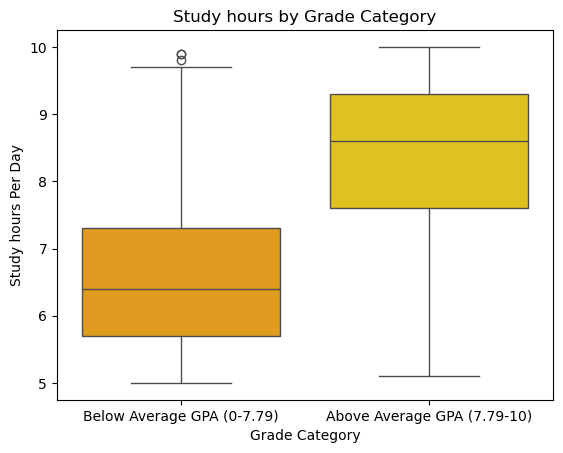

In [15]:
sns.boxplot(x='Grade_Category', y='Study_Hours_Per_Day', data=data, palette=['orange','gold'])
plt.title("Study hours by Grade Category")
plt.xlabel("Grade Category")
plt.ylabel("Study hours Per Day")
plt.savefig('Studyhrs_GradeCat.jpg')
plt.show()

**Interpretation:** This distribution visually demonstrates the difference in frequency of studying across high-achieving and low-achieving students. The data shows that low-achieving students significantly study less than high-achieving students. However, there are some outliers within the Below Average GPA group, there are two students who have studied significantly,but received lower GPAs. This could be explained by other factors not acknowledged within the dataset. These students could have personal factors that prevent them from scoring a higher grade. 

#### SECTION II: RELATIONSHIP VISUALIZATIONS 

##### Heatmap

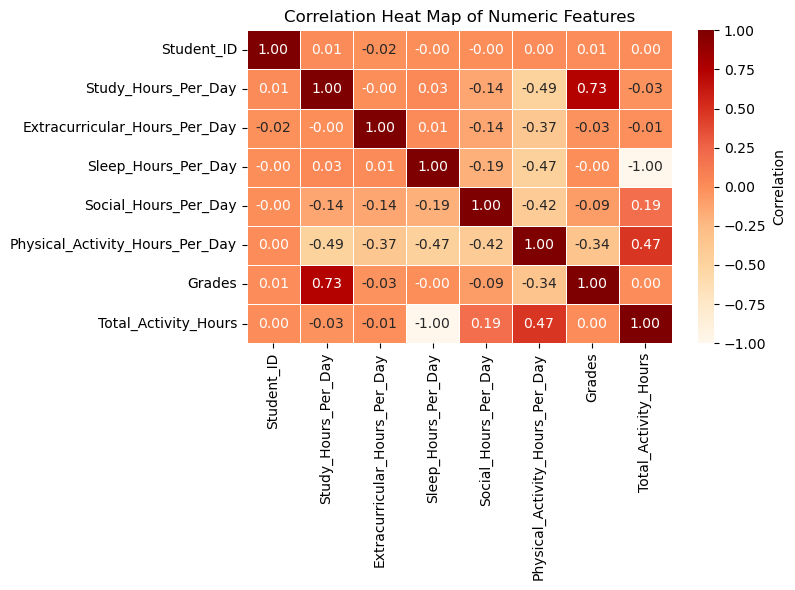

In [8]:
corr_matrix= data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
ax = sns.heatmap(
    corr_matrix, annot=True, fmt=".2f",
    cmap="OrRd", center=0,
    linewidths=0.5, cbar_kws={"label": "Correlation"}
)
plt.title("Correlation Heat Map of Numeric Features")
plt.tight_layout()
plt.savefig('heatmap.jpg')
plt.show()

**Interpretation**:
The correlation heatmap provides insight into the linear relationships between the numerical variables in the dataset. The strongest relationship observed is the highly positive correlation between Grades and Study Hours Per Day, suggesting that students who dedicate more time to studying tend to achieve higher GPA scores. There is also a negative correlation between sleep hours and physical activity hours, which indicates that as sleep or physical activity hours increase, the other decreases. This map allows me to see what relationships I might want to focus on when making future visualizations.

##### Scatterplot

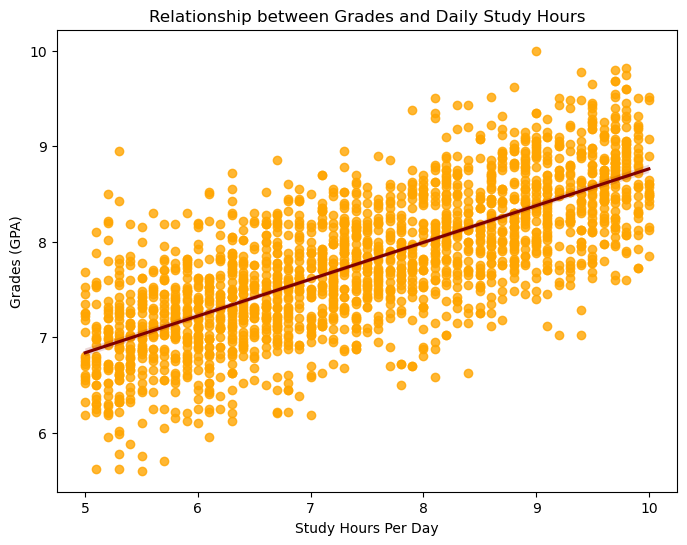

In [53]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Study_Hours_Per_Day',
    y='Grades',               
    data=data,
    fit_reg= True,
    color= 'orange',
    line_kws= {'color':'maroon'}
)
plt.title("Relationship between Grades and Daily Study Hours")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Grades (GPA)")
plt.show()

**Interpretation:** Based on this visualization, a clear, strong positive linear relationship exists between Study Hours and GPA. The data points form an upward pattern, indicating that as the time students dedicate to studying increases, their GPA tends to rise. The regression for this trend reflects the +0.73 correlation seen in the heatmap. This suggests that daily study time is a highly significant predictor of academic achievement within this dataset. There are a few outliers with higher grades but lower reported study hours. This can indicate that study hours and GPA could also depend on the individual. Some students may be able to achieve higher grades without studying as much. 